In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


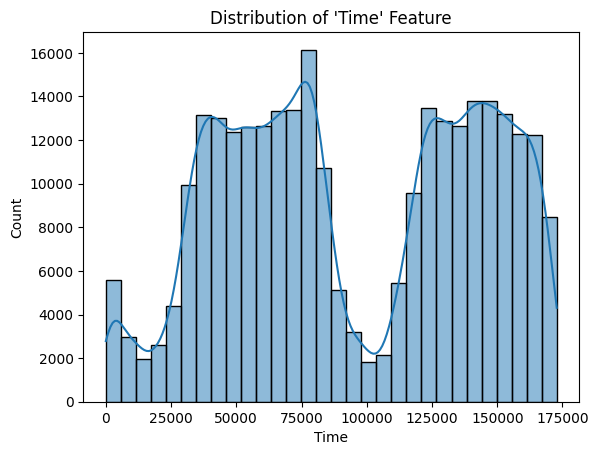

In [3]:
sns.histplot(data['Time'], kde=True, bins=30)
plt.title("Distribution of 'Time' Feature")
plt.show()

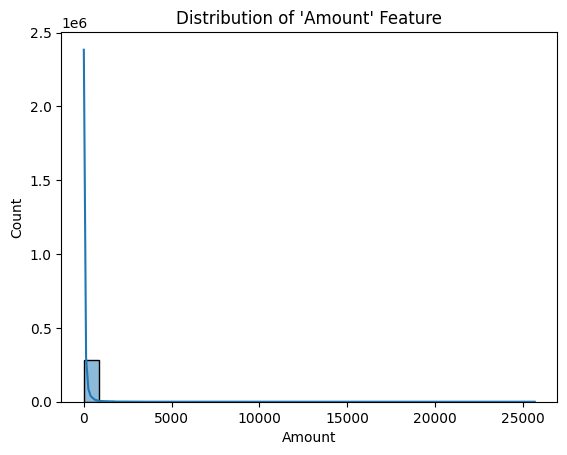

In [4]:
sns.histplot(data['Amount'], kde=True, bins=30)
plt.title("Distribution of 'Amount' Feature")
plt.show()

In [5]:
X = data.drop(['Class'], axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
importantFeatures = X.columns[importances > np.mean(importances)]

X_rf = data[importantFeatures]

print(importantFeatures)
print(X_rf.shape)

Index(['V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')
(284807, 6)


In [6]:
def purityScore(yTrue, yPred):
    contingencyMatrix = metrics.cluster.contingency_matrix(yTrue, yPred)
    return np.sum(np.amax(contingencyMatrix, axis=0)) / np.sum(contingencyMatrix)

In [7]:
kMeans = KMeans(n_clusters=4, random_state=42)
kMeansLabels = kMeans.fit_predict(X_rf)

In [8]:
kmeansPurity = purityScore(y, kMeansLabels)
# kmeansSilhouette = silhouette_score(X_rf, kmeans_labels)
kmeansSilhouette = silhouette_score(X_rf, kMeansLabels, sample_size=50000)
kmeansCalinski = calinski_harabasz_score(X_rf, kMeansLabels)

print("KMeans")
print(f"Purity Score: {kmeansPurity}")
print(f"Silhouette Score: {kmeansSilhouette}")
print(f"Calinski-Harabasz Score: {kmeansCalinski}")

KMeans
Purity Score: 0.9982725143693799
Silhouette Score: 0.18739613973027267
Calinski-Harabasz Score: 42353.281101807785


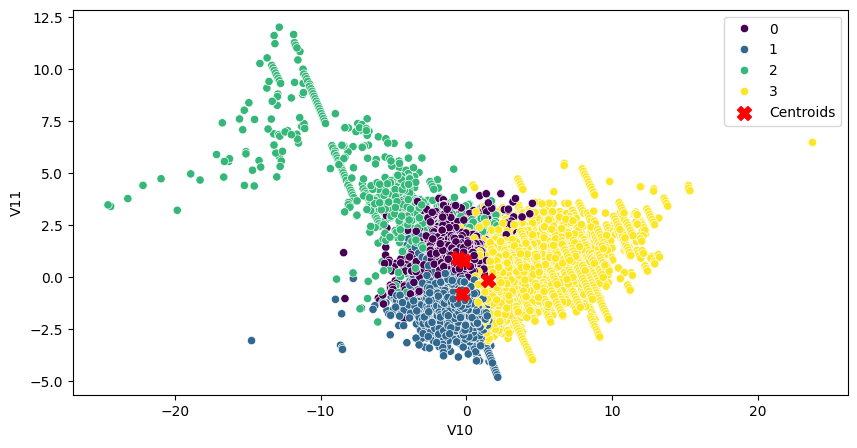

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_rf.iloc[:, 0], y=X_rf.iloc[:, 1], hue=kMeansLabels, palette='viridis', legend='full')
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label="Centroids")
plt.legend()
plt.show()

In [10]:
dbscan = DBSCAN(eps=0.8, min_samples=32)
dbscanLabels = dbscan.fit_predict(X_rf)

In [11]:
dbscanPurity = purityScore(y, dbscanLabels) if len(set(dbscanLabels)) > 1 else None
dbscanSilhouette = silhouette_score(X_rf, dbscanLabels, sample_size=50000) if len(set(dbscanLabels)) > 1 else None
dbscanCalinski = calinski_harabasz_score(X_rf, dbscanLabels) if len(set(dbscanLabels)) > 1 else None

print("DBSCAN")
print(f"Purity Score: {dbscanPurity}")
print(f"Silhouette Score: {dbscanSilhouette}")
print(f"Calinski-Harabasz Score: {dbscanCalinski}")

DBSCAN
Purity Score: 0.9982725143693799
Silhouette Score: 0.4273276808728588
Calinski-Harabasz Score: 1636.8500802781048
